
# Decision Tree Classifier


+ basic sklearn calls
+ show that max depth may cause overtraining


In [1]:
import numpy as np
import pylab as plt
from sklearn import svm
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import neighbors, datasets
from sklearn.tree import DecisionTreeClassifier

from tqdm import tqdm
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [46]:
Dp0=pd.read_csv('../datasets/S_MPOS_27_100',delimiter=" ",header=None)
Dn0=pd.read_csv('../datasets/S_MNEG_27_100',delimiter=" ",header=None)
Dp0s=Dp0
Dn0s=Dn0.sample(Dp0s.index.size)
Dn0s=Dn0.sample(2000)

D=pd.concat([Dp0s,Dn0s])
y=np.append(np.zeros([Dp0s.index.size,1]),np.ones([Dn0s.index.size,1]))

X=D.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

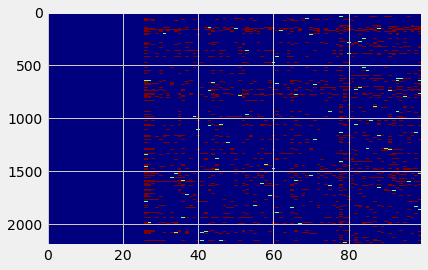

In [47]:
plt.imshow(X,aspect='auto',cmap='jet');

In [48]:
clf = DecisionTreeClassifier(max_depth=7, class_weight='balanced')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Number of mislabeled points out of a total %d points : %d"% (y_test.shape[0],(y_test != y_pred).sum()))

acc=clf.score(X_test,y_test)
y_pred=clf.predict_proba(X_test)
y_pred_insample=clf.predict_proba(X_train)
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred[:,1], pos_label=1)
fpr_insample, tpr_insample, thresholds_insample = metrics.roc_curve(y_train,y_pred_insample[:,1], pos_label=1)
auc=metrics.auc(fpr, tpr)
auc_insample=metrics.auc(fpr_insample, tpr_insample)

print('Accuracy: ',acc,'AUC oos: ',auc,'AUC in sample: ',auc_insample)

Number of mislabeled points out of a total 1102 points : 164
Accuracy:  0.8511796733212341 AUC oos:  0.5873673757382533 AUC in sample:  0.7476828540524412


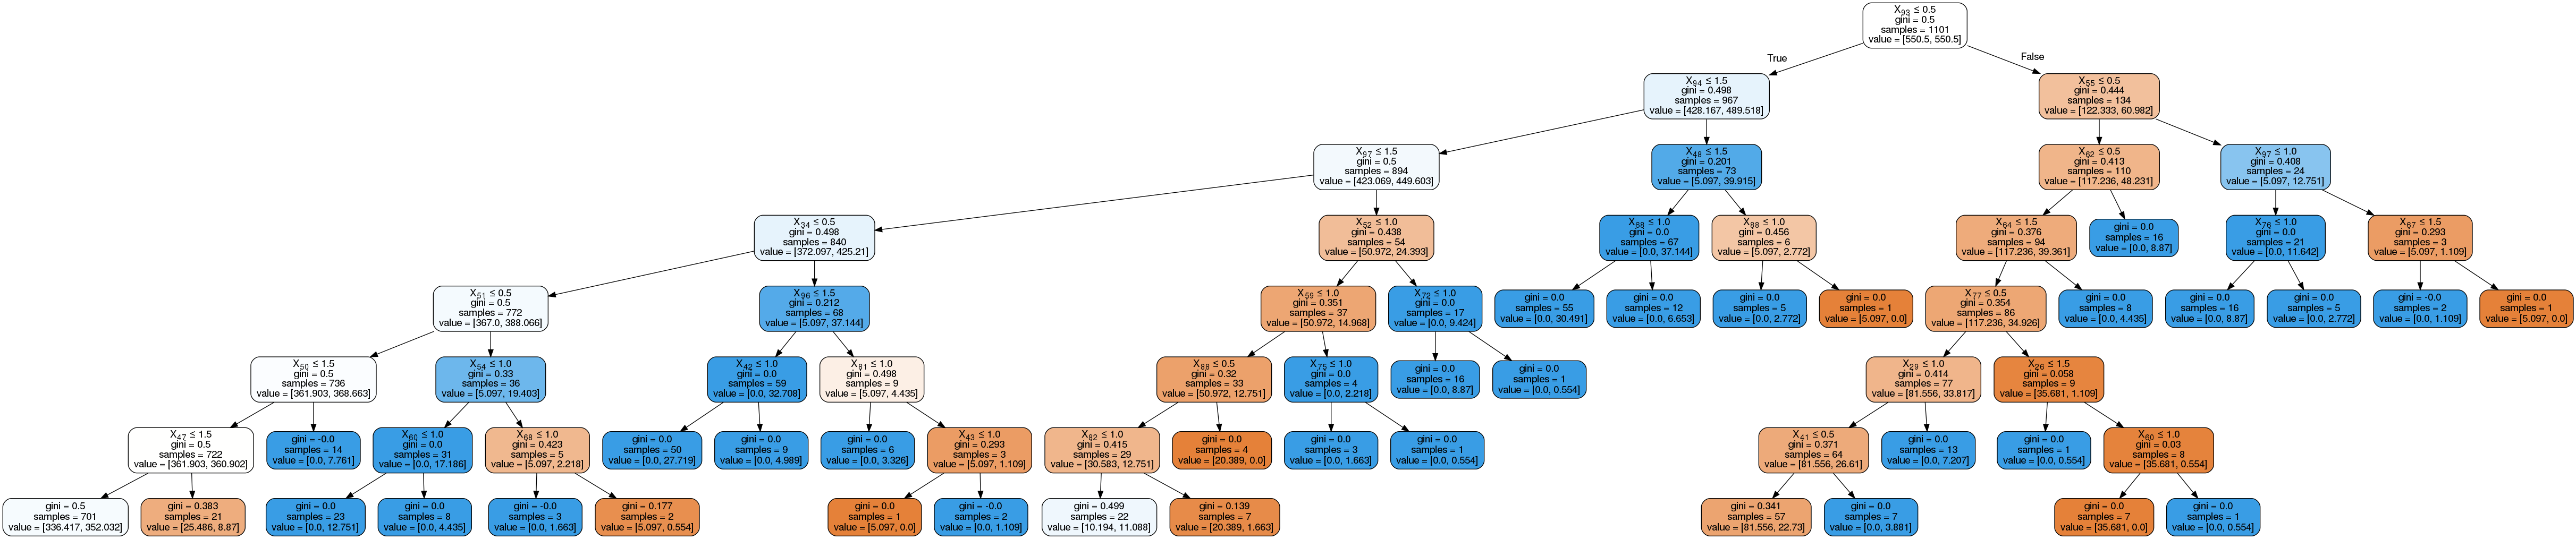

In [49]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from subprocess import call


dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png(), width=1900, unconfined=True)

In [50]:
# check how much the performance varies by random splits (variance)
RUNS=50
P=[]
for run in tqdm(np.arange(RUNS)):
    clf = DecisionTreeClassifier(max_depth=7, class_weight='balanced')
    y_pred = clf.fit(X_train, y_train).predict(X_test)
    acc=clf.score(X_test,y_test)
    y_pred=clf.predict_proba(X_test)
    fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred[:,1], pos_label=1)
    auc=metrics.auc(fpr, tpr)
    P=np.append(P,[acc,auc])
P=P.reshape(int(len(P)/2),2)

100%|██████████| 50/50 [00:00<00:00, 155.29it/s]


Text(0.5, 1.0, 'AUC')

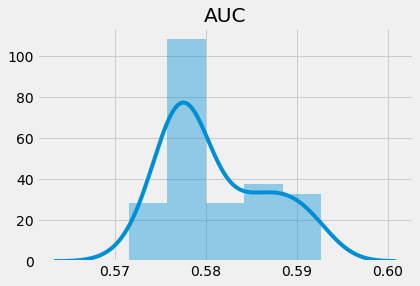

In [51]:
#auc
ax=sns.distplot(P[:,1])
ax.set_title('AUC')

Text(0.5, 1.0, 'accuracy')

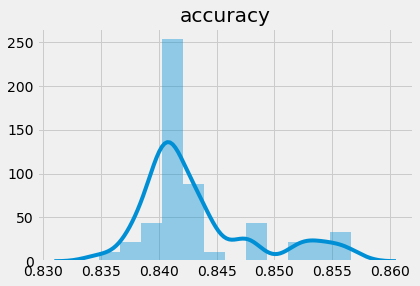

In [52]:
#acc
ax=sns.distplot(P[:,0])
ax.set_title('accuracy')

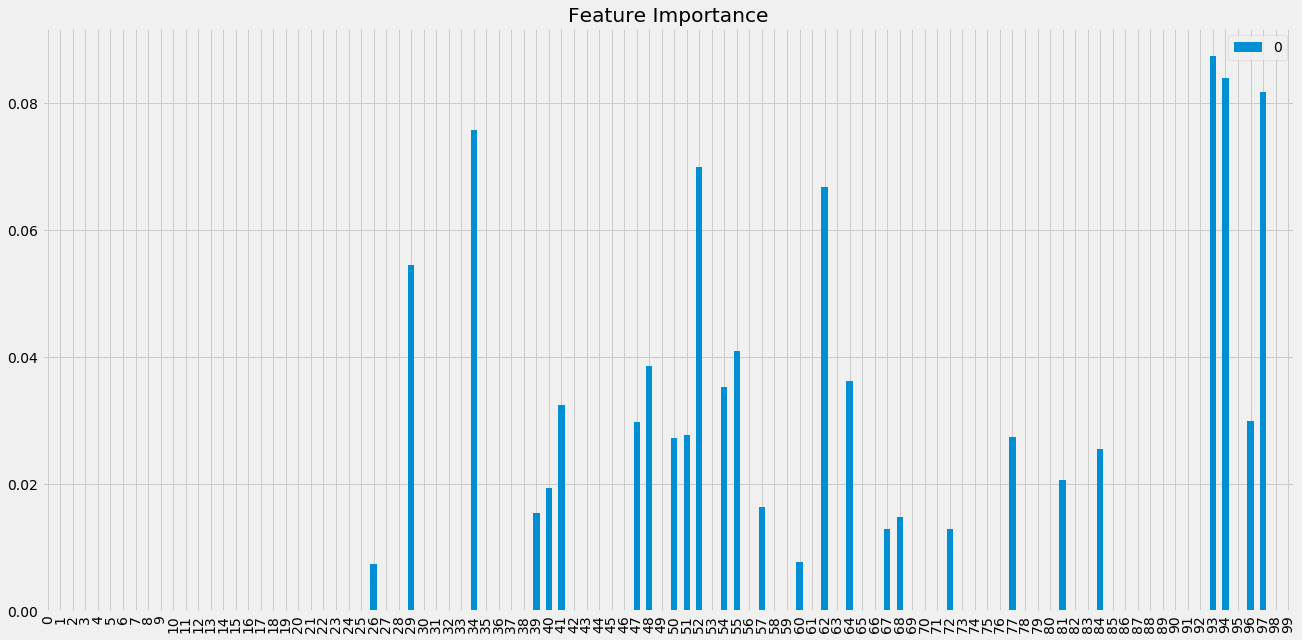

In [53]:
# compute feature importance
plt.figure(figsize=[20,10])
ax=plt.gca()
FI={}
count=0
FI=np.array(clf.feature_importances_)
#FI=FI/len(clf.estimators_)
ax=pd.DataFrame(FI).plot(kind='bar',ax=ax)
ax.set_title('Feature Importance');

# Investigate correlation problem in bagging classifiers

In [54]:
Dp0=pd.read_csv('../datasets/S_MPOS_27_100',delimiter=" ",header=None)
Dn0=pd.read_csv('../datasets/S_MNEG_27_100',delimiter=" ",header=None)

Dp0s=Dp0
Dn0s=Dn0.sample(Dp0s.index.size)
Dn0s=Dn0.sample(2000)


D=pd.concat([Dp0s,Dn0s])
y=np.append(np.zeros([Dp0s.index.size,1]),np.ones([Dn0s.index.size,1]))

# Add a strong feature

In [62]:
D['strong_feature']=np.random.normal(-.1, .1, y.shape)+y*.002

X=D.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [63]:
clf = DecisionTreeClassifier(max_depth=None, class_weight='balanced')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Number of mislabeled points out of a total %d points : %d"% (y_test.shape[0],(y_test != y_pred).sum()))

acc=clf.score(X_test,y_test)
y_pred=clf.predict_proba(X_test)
y_pred_insample=clf.predict_proba(X_train)
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred[:,1], pos_label=1)
fpr_insample, tpr_insample, thresholds_insample = metrics.roc_curve(y_train,y_pred_insample[:,1], pos_label=1)
auc=metrics.auc(fpr, tpr)
auc_insample=metrics.auc(fpr_insample, tpr_insample)

print('Accuracy: ',acc,'AUC oos: ',auc,'AUC in sample: ',auc_insample)

Number of mislabeled points out of a total 1102 points : 172
Accuracy:  0.8439201451905626 AUC oos:  0.5172470674486804 AUC in sample:  1.0


In [64]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from subprocess import call


dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png(), width=1900, unconfined=True)

In [65]:
# check how much the performance varies by random splits (variance)
RUNS=50
P=[]
for run in tqdm(np.arange(RUNS)):
    clf = DecisionTreeClassifier(max_depth=7, class_weight='balanced')
    y_pred = clf.fit(X_train, y_train).predict(X_test)
    acc=clf.score(X_test,y_test)
    y_pred=clf.predict_proba(X_test)
    fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred[:,1], pos_label=1)
    auc=metrics.auc(fpr, tpr)
    P=np.append(P,[acc,auc])
P=P.reshape(int(len(P)/2),2)

100%|██████████| 50/50 [00:00<00:00, 157.23it/s]


Text(0.5, 1.0, 'AUC')

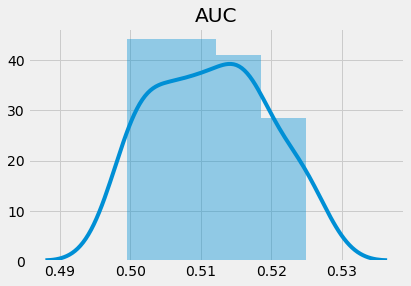

In [66]:
#auc
ax=sns.distplot(P[:,1])
ax.set_title('AUC')

Text(0.5, 1.0, 'accuracy')

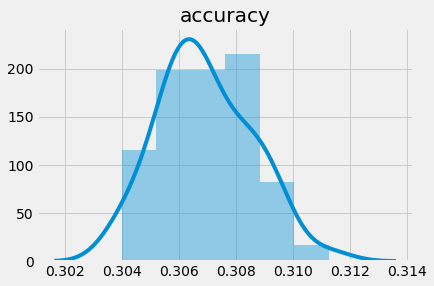

In [67]:
#acc
ax=sns.distplot(P[:,0])
ax.set_title('accuracy')

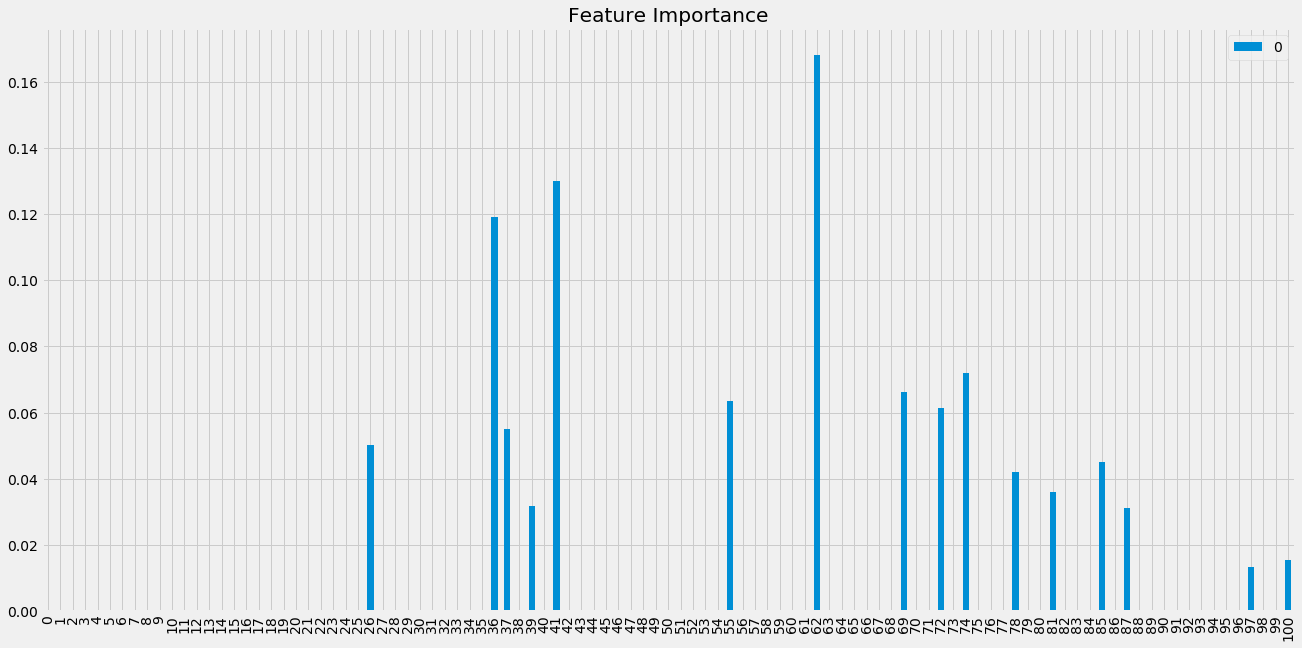

In [68]:
# compute feature importance
plt.figure(figsize=[20,10])
ax=plt.gca()
FI={}
count=0
FI=np.array(clf.feature_importances_)
#FI=FI/len(clf.estimators_)
ax=pd.DataFrame(FI).plot(kind='bar',ax=ax)
ax.set_title('Feature Importance');